# Dynamic TWFE の解釈

In [1]:
import re
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# データの読み込み
path = '../../data/processed/dynamic_twfe/beta_samples.csv'
df = pl.read_csv(path)

In [2]:
# 介入前の推定量
negative_columns = [col for col in df.columns if re.search(r'-\d+\.\d+', col)]
pre = df[negative_columns]
post = df.drop(negative_columns)

In [3]:
pre_mean = pre.transpose().mean().transpose()
post_mean = post.transpose().mean().transpose()
post_minus_pre = post_mean - pre_mean

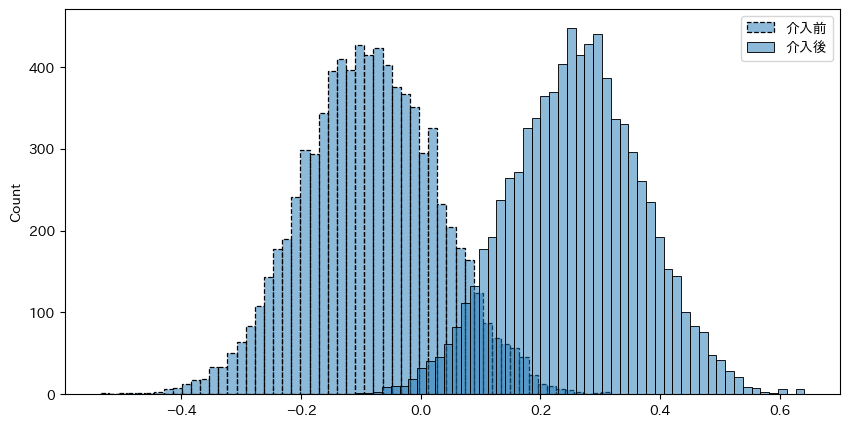

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(pre_mean, ax=ax, label='介入前', color='black', linestyle='--')
sns.histplot(post_mean, ax=ax, label='介入後', color='black')
ax.legend()

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_12418/1729218639.py:4: SyntaxWarning: invalid escape sequence '\e'
  sns.kdeplot(post_minus_pre, label='$\\bar{β}_{\ell≧0} - \\bar{β}_{\ell<0}$', color='k', ax=ax)
/tmp/ipykernel_12418/1729218639.py:6: SyntaxWarning: invalid escape sequence '\e'
  ax.set_title('介入後平均 $\\left( \\bar{β}_{\ell≧0} \\right)$ と介入前平均 $\\left( \\bar{β}_{\ell<0} \\right)$ の差')


shape: (1, 1)
┌──────────┐
│ column_0 │
│ ---      │
│ f64      │
╞══════════╡
│ 0.343729 │
└──────────┘ shape: (1, 1)
┌──────────┐
│ column_0 │
│ ---      │
│ f64      │
╞══════════╡
│ 0.154819 │
└──────────┘


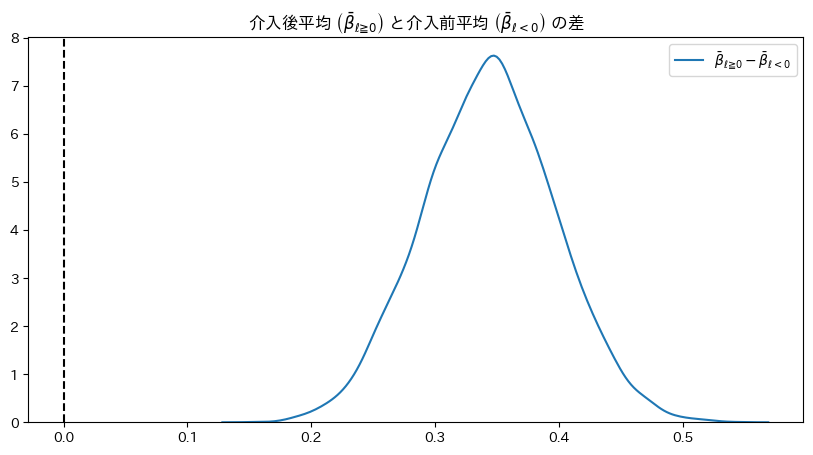

In [36]:
print(post_minus_pre.mean(), post_minus_pre.min())

fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(post_minus_pre, label='$\\bar{β}_{\ell≧0} - \\bar{β}_{\ell<0}$', color='k', ax=ax)
ax.axvline(0, color='k', linestyle='--')
ax.set_title('介入後平均 $\\left( \\bar{β}_{\ell≧0} \\right)$ と介入前平均 $\\left( \\bar{β}_{\ell<0} \\right)$ の差')
ax.set_ylabel('')
ax.legend()
plt.savefig('../../docs/figures/dynamic_twfe/post_minus_pre_posterior.png')

In [ ]:
beta_ell_df_pre = df[negative_columns]

total_elements_pre = beta_ell_df_pre.size
positive_elements_pre = (beta_ell_df_pre > 0).sum().sum()
positive_ratio_pre = positive_elements_pre / total_elements_pre
print(f'介入前で正の確率: {positive_ratio_pre:.3%}')

beta_ell_df_pre_10 = beta_ell_df_pre.iloc[:, 28:-1]
total_elements_pre_10 = beta_ell_df_pre_10.size
positive_elements_pre_10 = (beta_ell_df_pre_10 > 0).sum().sum()
positive_ratio_pre_10 = positive_elements_pre_10 / total_elements_pre_10
print(f'介入前10年間で正の確率: {positive_ratio_pre_10:.3%}')

beta_ell_df_pre_20 = beta_ell_df_pre.iloc[:, 18:-1]
total_elements_pre_20 = beta_ell_df_pre_20.size
positive_elements_pre_20 = (beta_ell_df_pre_20 > 0).sum().sum()
positive_ratio_pre_20 = positive_elements_pre_20 / total_elements_pre_20
print(f'介入前20年間で正の確率: {positive_ratio_pre_20:.3%}')

beta_ell_df_pre_30 = beta_ell_df_pre.iloc[:, 9:-1]
total_elements_pre_30 = beta_ell_df_pre_30.size
positive_elements_pre_30 = (beta_ell_df_pre_30 > 0).sum().sum()
positive_ratio_pre_30 = positive_elements_pre_30 / total_elements_pre_30
print(f'介入前30年間で正の確率: {positive_ratio_pre_30:.3%}')

beta_ell_df_pre_40 = beta_ell_df_pre.iloc[:, 3:-1]
total_elements_pre_40 = beta_ell_df_pre_40.size
positive_elements_pre_40 = (beta_ell_df_pre_40 > 0).sum().sum()
positive_ratio_pre_40 = positive_elements_pre_40 / total_elements_pre_40
print(f'介入前40年間で正の確率: {positive_ratio_pre_40:.3%}')


## 5年前から上昇しているのか？

In [19]:
pre_m46_m6 = pre.select(pre.columns[0:-5]) # -46年から-6年まで
pre_m5 = pre.select(pre.columns[-5:-1]) # -5年から-1年まで
pre_m46_m6_mean = pre_m46_m6.transpose().mean().transpose()
pre_m5_mean = pre_m5.transpose().mean().transpose()

pre_5_minus_m46_m6 = pre_m5_mean - pre_m46_m6_mean

In [27]:
(pre_5_minus_m46_m6 > 0).sum() / pre_5_minus_m46_m6.count()

column_0
f64
0.514375


<Axes: ylabel='Count'>

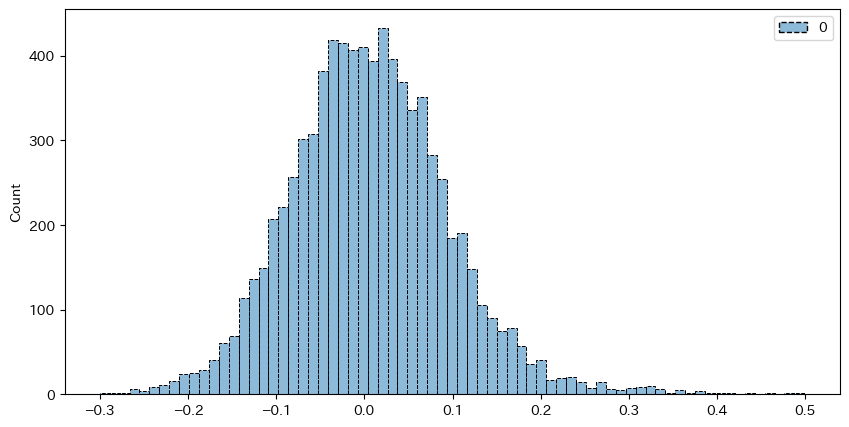

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(pre_5_minus_m46_m6, ax=ax, label='介入前(46-6)', color='black', linestyle='--')